In [1]:
from matplotlib import pyplot as plt
from Car import CarRacing
import tensorflow as tf
import numpy as np
import keyboard
from SAC import Agent

#================Enable GPU usage====================================
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

#========Operational Instructions=========
render = False
debugging = False
training = True
load_checkpoint = False

#===========Constants================
n_episodes = 7000
env = CarRacing(obstacles = False)
agent = Agent(env)
total_steps = 0
if load_checkpoint:
    total_rewards = list(agent.load_rewards('total'))
    avg_rewards = list(agent.load_rewards('avg'))
    episode_offset = len(total_rewards)
    agent.load_models()
    agent.load_buffer()
else:
    total_rewards = []
    avg_rewards = []

#================Main loop===============================
for episode in range(n_episodes):
    if load_checkpoint: episode += episode_offset
    env.reset()
    episode_step = 0
    print('\n','='*10,'Episode ',episode + 1, '='*10)
    done = False
    episode_reward = 0
    while not done:
        if render: isopen = env.render()
        else: isopen = True
        if debugging and keyboard.is_pressed('~'): done = True; isopen = False; break
        episode_step += 1
        done, reward = agent.step(training, episode + 1, episode_step)
        episode_reward += reward
    total_rewards.append(episode_reward)
    avg_rewards.append(np.mean(total_rewards[-100:]))
    print('Episode Score: {} | AVG Score: {} | Maximum Episode Score: {}'.format(episode_reward, avg_rewards[-1], np.max(total_rewards)))
    if (episode+1) % 2 == 0: 
        agent.save_rewards(total_rewards, 'total')
        agent.save_rewards(avg_rewards, 'avg')
        
    total_steps += episode_step
    
    if not isopen: env.close();  break
env.close()

C:\Users\jesse\AppData\Roaming\Python\Python38\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
... loading rewards ...
... loading rewards ...
... loading models ...
...loading buffer...

 ========== Episode  5 ==========
Episode Score: 56.58458781361991 | AVG Score: 53.40459580266865 | Maximum Episode Score: 66.9188679245286

 ========== Episode  6 ==========
... saving models ...
... saving buffer ...
Episode Score: 51.301234567901055 | AVG Score: 53.05403559687406 | Maximum Episode Score: 66.9188679245286

 ========== Episode  7 ==========
Episode Score: 63.20808080808099 | AVG Score: 54.504613484189335 | Maximum Episode Score: 66.9188679245286

 ========== Episode  8 ==========
... saving models ...
... saving buffer ...


KeyboardInterrupt: 

In [7]:
len(agent.agent.replay_buffer.memory),

(1047, 2100)

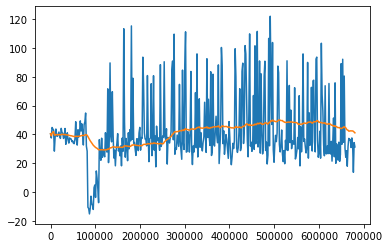

In [8]:
plt.plot(np.linspace(0,agent.agent.global_step*4,len(total_rewards)),total_rewards)
plt.plot(np.linspace(0,agent.agent.global_step*4,len(avg_score)), avg_score)~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [6]:
agent.agent.global_step*4

680536

In [2]:
avg_rewards

[38.31170568561857,
 46.68647173531734,
 53.43060379838776,
 52.609597799930846,
 53.40459580266865,
 53.05403559687406,
 54.504613484189335]